# **Image Classification for simple objects**

## *Download Dataset from kaggle*

In [1]:
!kaggle datasets download -d kkhandekar/image-dataset

Dataset URL: https://www.kaggle.com/datasets/kkhandekar/image-dataset
License(s): CC0-1.0
 99% 170M/171M [00:07<00:00, 35.7MB/s]
100% 171M/171M [00:07<00:00, 25.1MB/s]


In [2]:
!unzip /content/image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: _train/car/car_0437.jpg  
  inflating: _train/car/car_0438.jpg  
  inflating: _train/car/car_0439.jpg  
  inflating: _train/car/car_0440.jpg  
  inflating: _train/car/car_0441.jpg  
  inflating: _train/car/car_0442.jpg  
  inflating: _train/car/car_0443.jpg  
  inflating: _train/car/car_0444.jpg  
  inflating: _train/car/car_0445.jpg  
  inflating: _train/car/car_0446.jpg  
  inflating: _train/car/car_0447.jpg  
  inflating: _train/car/car_0448.jpg  
  inflating: _train/car/car_0449.jpg  
  inflating: _train/car/car_0450.jpg  
  inflating: _train/car/car_0451.jpg  
  inflating: _train/car/car_0452.jpg  
  inflating: _train/car/car_0453.jpg  
  inflating: _train/car/car_0454.jpg  
  inflating: _train/car/car_0455.jpg  
  inflating: _train/car/car_0456.jpg  
  inflating: _train/car/car_0457.jpg  
  inflating: _train/car/car_0458.jpg  
  inflating: _train/car/car_0459.jpg  
  inflating: _train/car/car_0460.jpg  
  inflating: 

## *Import Dependencies*

In [3]:
import numpy as np
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

## *Load Data through genrators*

In [4]:
data_dir = "/content/_train"
test_dir = "/content/_test"

In [5]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [6]:
train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="training"
)

validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="validation"
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4770 images belonging to 8 classes.
Found 1189 images belonging to 8 classes.
Found 940 images belonging to 8 classes.


In [7]:
train_generator.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

## *Sample Images*

In [9]:
sample_batch  = next(train_generator)
images, labels = sample_batch

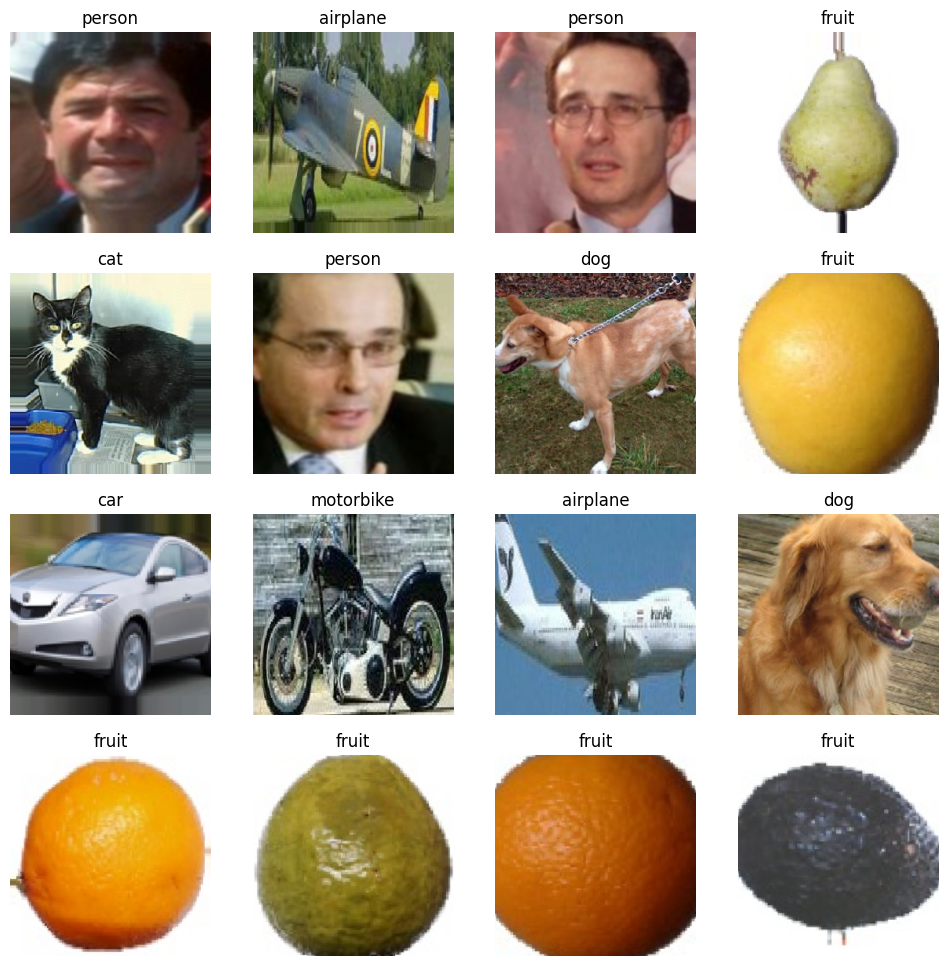

In [10]:
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes  = axes.ravel()

for i, (img, label) in enumerate(zip(images, labels)):
  if i == n_rows * n_cols:
    break
  axes[i].imshow(img)
  label_name = class_names[np.argmax(label)]
  axes[i].set_title(label_name)
  axes[i].axis('off')


## *Model Architecture*

In [11]:
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(8, activation="softmax"))

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [13]:
history = model.fit(
    train_generator,
    epochs=5,
    batch_size=32,
    validation_data=validation_generator
)

Epoch 1/5
150/150 [==============================] - 98s 604ms/step - loss: 1.2739 - accuracy: 0.6660 - val_loss: 0.6077 - val_accuracy: 0.7839
Epoch 2/5
150/150 [==============================] - 88s 586ms/step - loss: 0.3995 - accuracy: 0.8587 - val_loss: 0.3977 - val_accuracy: 0.8713
Epoch 3/5
150/150 [==============================] - 89s 592ms/step - loss: 0.3423 - accuracy: 0.8774 - val_loss: 0.3596 - val_accuracy: 0.8797
Epoch 4/5
150/150 [==============================] - 88s 587ms/step - loss: 0.2593 - accuracy: 0.9071 - val_loss: 0.3803 - val_accuracy: 0.8654
Epoch 5/5
150/150 [==============================] - 91s 610ms/step - loss: 0.2361 - accuracy: 0.9071 - val_loss: 0.3240 - val_accuracy: 0.8865


## *Plotting Metrics*

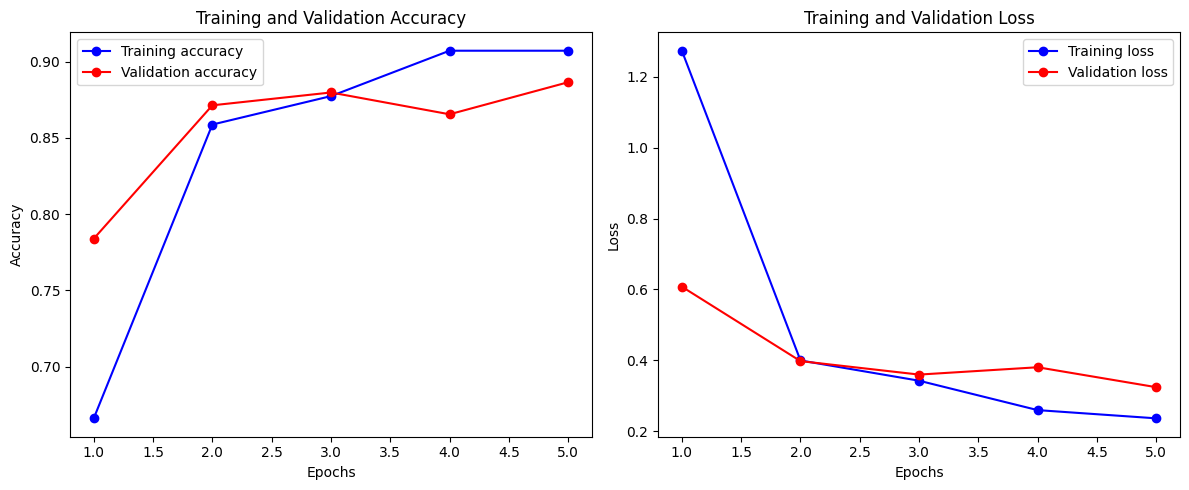

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## *Evaluation*

In [15]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

30/30 [==============================] - 2s 68ms/step - loss: 0.2131 - accuracy: 0.9234
Test Loss: 0.21310366690158844
Test Accuracy: 0.9234042763710022


## *Predictions*

In [16]:
def predict_image(img_path):
  img = Image.open(img_path).convert("RGB").resize((256, 256))
  img_array = np.array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)

  yhat = model.predict(img_array)
  predicted_class = class_names[np.argmax(yhat)]

  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class}")
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 209ms/step


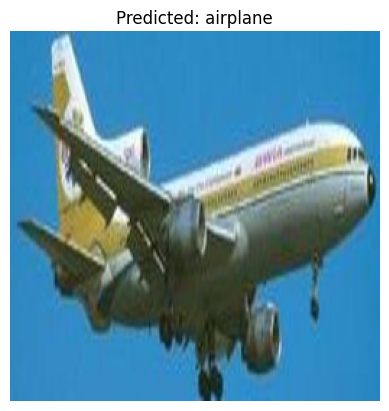

In [17]:
predict_image("/content/_test/airplane/airplane_0585.jpg")

1/1 [==============================] - 0s 21ms/step


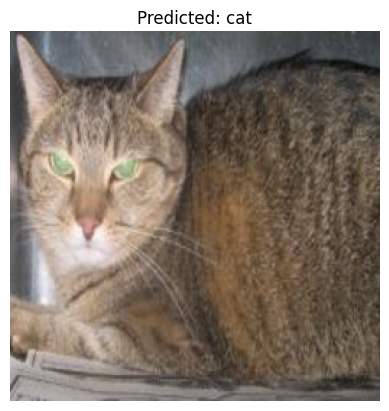

In [18]:
predict_image("/content/_test/cat/cat_0075.jpg")

1/1 [==============================] - 0s 17ms/step


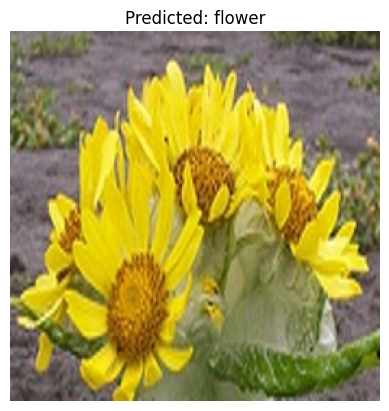

In [19]:
predict_image("/content/_test/flower/flower_0079.jpg")

1/1 [==============================] - 0s 18ms/step


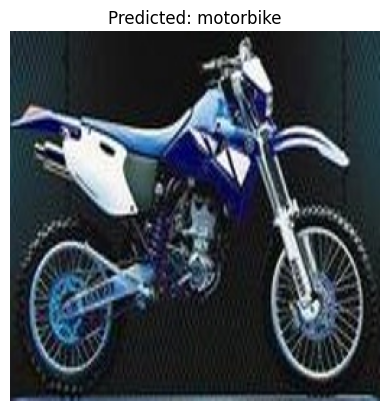

In [20]:
predict_image("/content/_test/motorbike/motorbike_0055.jpg")